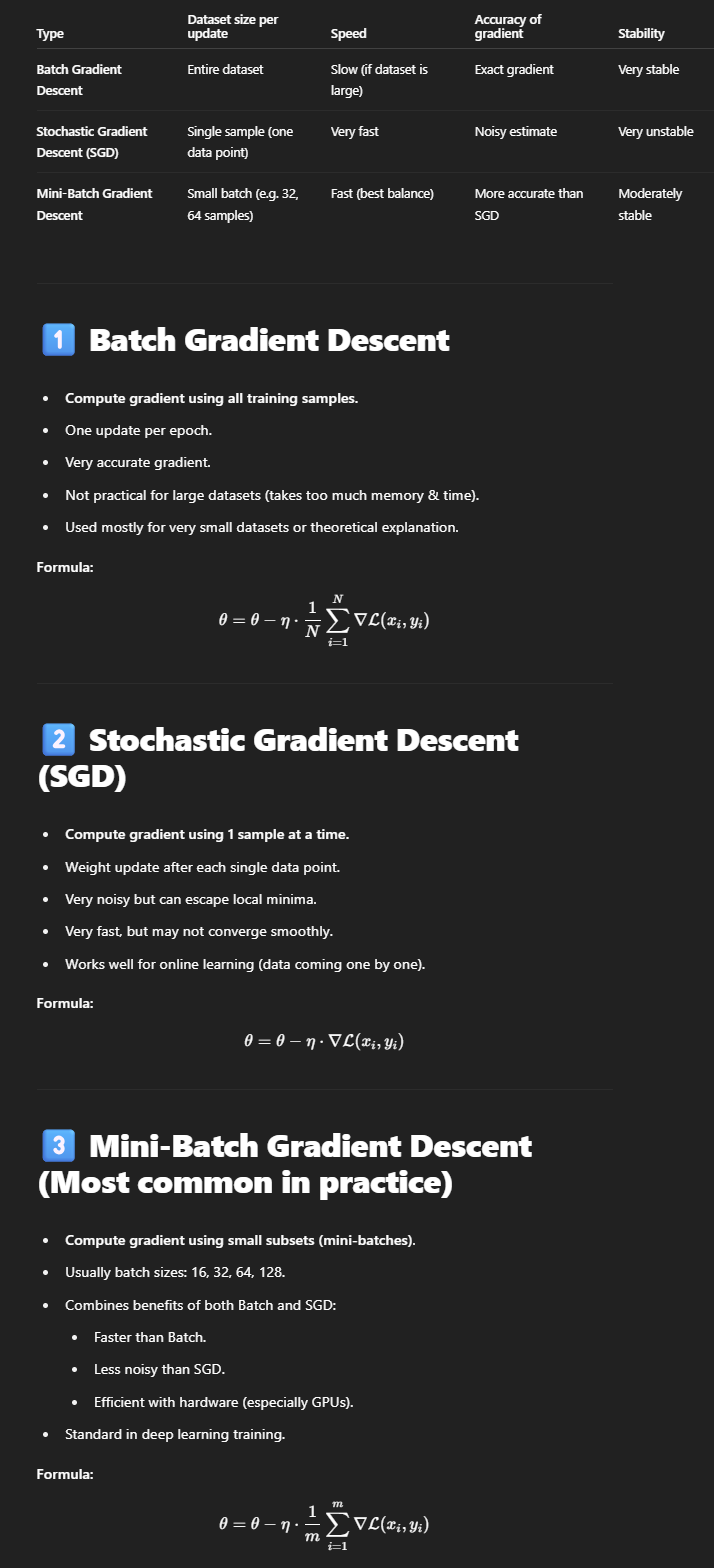

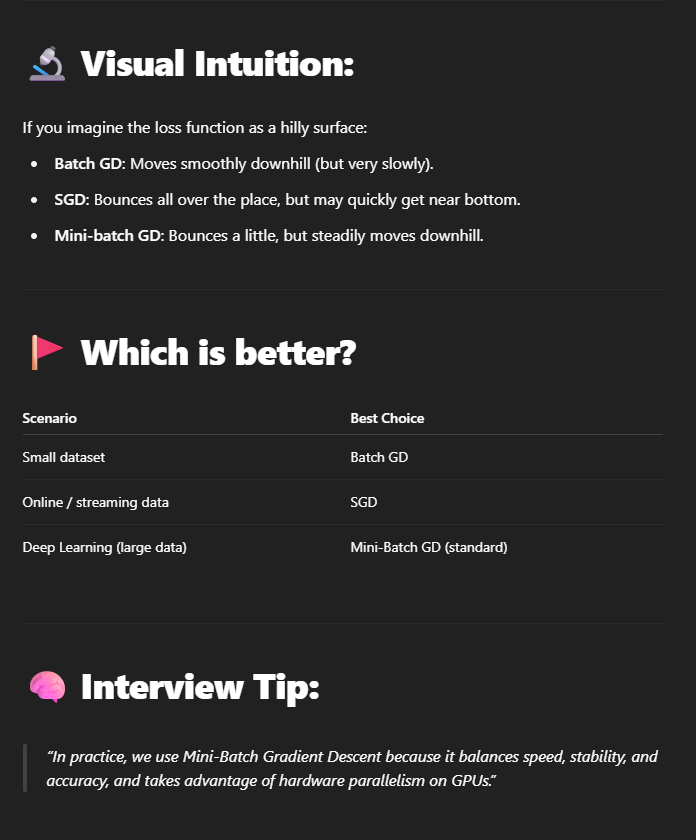

In [2]:
# Upload the Dataset

from google.colab import files
files.upload()


Saving homeprices_banglore.csv to homeprices_banglore.csv


{'homeprices_banglore.csv': b'area,bedrooms,price\n1056,2,39.07\n2600,4,120\n1440,3,62\n1521,3,75\n1200,2,51\n1170,2,38\n2732,4,135\n3300,4,155\n1310,3,50\n3700,5,167\n1800,3,82\n2785,4,140\n1000,2,38\n1100,2,40\n2250,3,101\n1175,2,42\n1180,3,48\n1540,3,60\n2770,3,102\n800,1,32\n'}

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




# Define the Dataset

df = pd.read_csv('homeprices_banglore.csv')
print(df.head())


# Split the Dataset to Train & test

x = df[["area","bedrooms"]]
y = df.price

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("\nShape of x train :", x_train.shape)
print("Shape of y train :", y_train.shape)
print("Shape of x test :", x_test.shape)
print("Shape of y test :", y_test.shape)


# Scale the Dataset

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


print("\nScaled x train :", x_train_scaled)
print("\nScaled x test :", x_test_scaled)
print("\nScaled y train :", y_train_scaled)
print("\nScaled y test :", y_test_scaled)


   area  bedrooms   price
0  1056         2   39.07
1  2600         4  120.00
2  1440         3   62.00
3  1521         3   75.00
4  1200         2   51.00

Shape of x train : (14, 2)
Shape of y train : (14,)
Shape of x test : (6, 2)
Shape of y test : (6,)

Scaled x train : [[0.68448276 0.75      ]
 [0.24862069 0.5       ]
 [0.67931034 0.5       ]
 [0.13103448 0.5       ]
 [0.10344828 0.25      ]
 [0.22068966 0.5       ]
 [1.         1.        ]
 [0.         0.        ]
 [0.13793103 0.25      ]
 [0.06896552 0.25      ]
 [0.86206897 0.75      ]
 [0.34482759 0.5       ]
 [0.5        0.5       ]
 [0.6662069  0.75      ]]

Scaled x test : [[0.08827586 0.25      ]
 [0.25517241 0.5       ]
 [0.12931034 0.25      ]
 [0.62068966 0.75      ]
 [0.17586207 0.5       ]
 [0.12758621 0.25      ]]

Scaled y train : [[0.8       ]
 [0.31851852]
 [0.51851852]
 [0.11851852]
 [0.05925926]
 [0.22222222]
 [1.        ]
 [0.        ]
 [0.14074074]
 [0.04444444]
 [0.91111111]
 [0.37037037]
 [0.51111111]
 [0.76

## 1. Batch Gradient Descent

In [4]:
# Create a Nueral Network

model_batch = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', kernel_initializer="ones", bias_initializer="zeros")

])


# Compile

model_batch.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = "mean_squared_error",
              metrics = ["accuracy"]
              )


# Train the Data

history_batch = model_batch.fit(x_train_scaled, y_train_scaled, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Mini Batch Gradient Descent

In [6]:
# Create a Nueral Network

model_minibatch = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', kernel_initializer="ones", bias_initializer="zeros")

])


# Compile

model_minibatch.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = "mean_squared_error",
              metrics = ["accuracy"]
              )


# Train the Data

history_minibatch = model_minibatch.fit(x_train_scaled, y_train_scaled, epochs=50, batch_size = 10, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Stochastic Gradient Descent

In [8]:
# Create a Nueral Network

model_sgd = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', kernel_initializer="ones", bias_initializer="zeros")

])


# Compile

model_sgd.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = "mean_squared_error",
              metrics = ["accuracy"]
              )


# Train the Data

history_sgd = model_sgd.fit(x_train_scaled, y_train_scaled, epochs=50, batch_size = 1, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Plot all 3 Methods in a Graph

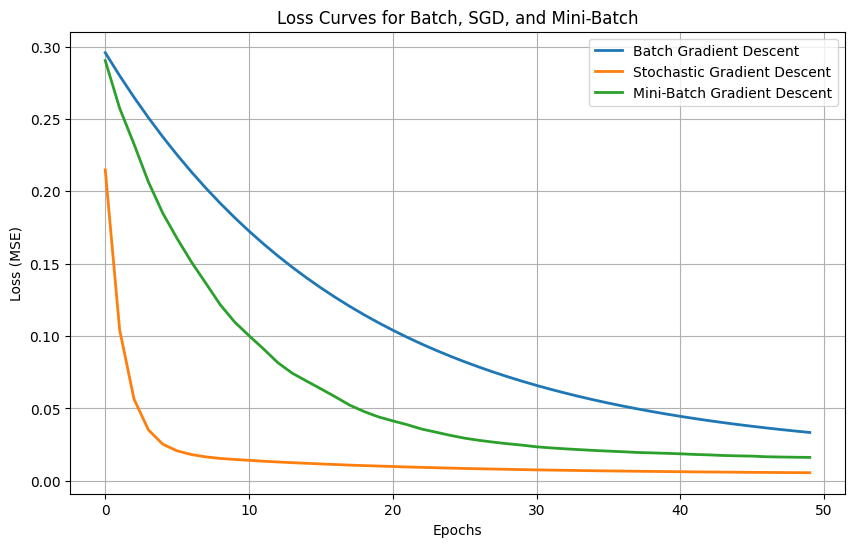

In [9]:
# Plot the Loss Curves

plt.figure(figsize=(10, 6))
plt.plot(history_batch.history['loss'], label='Batch Gradient Descent', linewidth=2)
plt.plot(history_sgd.history['loss'], label='Stochastic Gradient Descent', linewidth=2)
plt.plot(history_minibatch.history['loss'], label='Mini-Batch Gradient Descent', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curves for Batch, SGD, and Mini-Batch')

plt.legend()
plt.grid(True)

plt.show()
